In [115]:
# Classification Model
#Preprocessing

In [116]:
import pandas as pd

In [117]:
data = pd.read_excel("/content/Copper_Set.xlsx")

In [118]:
data.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [119]:
data["item_date"].unique()

array([20210401., 19950000., 20210331., 20210330., 20210329., 20210328.,
       20210327., 20210326., 20210325., 20210324., 20210323., 20210322.,
       20210319., 20210318., 20210317., 20210316., 20210315., 20210314.,
       20210313., 20210312., 20210311., 20210310., 20210309., 20210308.,
       20210307., 20210306., 20210305., 20210304., 20210303., 20210302.,
       20210301., 20210228., 20210227., 20210226., 20210225., 20210224.,
       20210223., 20210222., 20210221., 20210220., 20210219., 20210218.,
       20210217., 20210216., 20210215., 20210214., 20210213., 20210212.,
       20210211., 20210210., 20210209., 20210208., 20210207., 20210205.,
       20210204., 20210203., 20210202., 20210201., 20210131., 20210130.,
       20210129., 20210128., 20210127., 20210126., 20210125., 20210124.,
       20210122., 20210121., 20210120., 20210119., 20210118., 20210117.,
       20210116., 20210115., 20210114., 20210113., 20210112., 20210111.,
       20210110., 20210109., 20210108., 20210107., 

In [120]:
data["product_ref"].unique()

array([1670798778, 1668701718,     628377,     640665,     611993,
       1668701376,  164141591, 1671863738, 1332077137,     640405,
       1693867550, 1665572374, 1282007633, 1668701698,     628117,
       1690738206,     628112,     640400, 1671876026,  164336407,
        164337175, 1668701725, 1665572032,     611728, 1721130331,
       1693867563,     611733, 1690738219, 1722207579,  929423819,
       1665584320, 1665584662, 1665584642])

In [121]:
# First we have select the columns.

In [122]:
data.drop(columns = ["id","item_date","customer","application","material_ref","delivery date"],inplace = True)

In [123]:
data.head()

,quantity tons,country,status,item type,thickness,width,product_ref,selling_price
0,54.151139,28.0,Won,W,2.00,1500.0,1670798778,854.00
1,768.024839,25.0,Won,W,0.80,1210.0,1668701718,1047.00
2,386.127949,30.0,Won,WI,0.38,952.0,628377,644.33
3,202.411065,32.0,Won,S,2.30,1317.0,1668701718,768.00
4,785.526262,28.0,Won,W,4.00,2000.0,640665,577.00


In [124]:
data["status"].unique()

array(['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM',
       'Wonderful', 'Revised', 'Offered', 'Offerable', nan], dtype=object)

In [125]:
#remove duplicates

In [126]:
data.drop_duplicates()

,quantity tons,country,status,item type,thickness,width,product_ref,selling_price
0,54.151139,28.0,Won,W,2.00,1500.0,1670798778,854.00
1,768.024839,25.0,Won,W,0.80,1210.0,1668701718,1047.00
2,386.127949,30.0,Won,WI,0.38,952.0,628377,644.33
3,202.411065,32.0,Won,S,2.30,1317.0,1668701718,768.00
4,785.526262,28.0,Won,W,4.00,2000.0,640665,577.00
...,...,...,...,...,...,...,...,...
181668,102.482422,25.0,Won,W,0.96,1220.0,164141591,591.00
181669,208.086469,25.0,Won,W,0.95,1500.0,164141591,589.00
181670,4.235594,25.0,Won,W,0.71,1250.0,164141591,619.00
181671,-2000,25.0,Won,W,0.85,1250.0,164141591,601.00


In [127]:
data.columns

Index(['quantity tons', 'country', 'status', 'item type', 'thickness', 'width',
       'product_ref', 'selling_price'],
      dtype='object')

In [128]:
data.isna().sum()

quantity tons     0
country          28
status            2
item type         0
thickness         1
width             0
product_ref       0
selling_price     1
dtype: int64

In [129]:
#we have small number of nan values,insread of taking the average, we can drop it.

In [130]:
data.dropna(subset = "thickness", inplace = True)
data.dropna(subset = "selling_price", inplace = True)
data.dropna(subset = "country", inplace = True)
data.dropna(subset = "status", inplace = True)

In [131]:
data.isna().sum()

quantity tons    0
country          0
status           0
item type        0
thickness        0
width            0
product_ref      0
selling_price    0
dtype: int64

In [132]:
data.isnull().sum()

quantity tons    0
country          0
status           0
item type        0
thickness        0
width            0
product_ref      0
selling_price    0
dtype: int64

In [133]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181641 entries, 0 to 181672
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   quantity tons  181641 non-null  object 
 1   country        181641 non-null  float64
 2   status         181641 non-null  object 
 3   item type      181641 non-null  object 
 4   thickness      181641 non-null  float64
 5   width          181641 non-null  float64
 6   product_ref    181641 non-null  int64  
 7   selling_price  181641 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 12.5+ MB


In [134]:
#we have to check the values of zero,if value zero is corect we should leave as it is ,if it is not correct we have to drop it

In [135]:
columns = ["quantity tons","item type","country","status","thickness","width","product_ref","selling_price"]
for i in columns:
  zero = data[data[i] == 0]

In [136]:
zero

,quantity tons,country,status,item type,thickness,width,product_ref,selling_price
41,59.907355,25.0,Won,W,2500.0,1260.0,1670798778,0.0
45358,37.655706,26.0,Not lost for AM,W,2.0,1300.0,1670798778,0.0


In [137]:

columns = ["quantity tons","item type","thickness","width","product_ref","selling_price","status"]
for i in columns:
  data.drop(data[data[i] == 0].index , inplace = True)

In [138]:
columns = ["quantity tons","item type","thickness","width","product_ref","selling_price"]
for i in columns:
  zero = data[data[i] == 0]

In [139]:
zero

,quantity tons,country,status,item type,thickness,width,product_ref,selling_price


In [140]:
# the quantity tons are in object we have to check their are any letter in the rows because the quantity tones should be in int or float.

In [141]:
data[data["quantity tons"].astype(str).str.isalpha()]

,quantity tons,country,status,item type,thickness,width,product_ref,selling_price
173086,e,78.0,Won,W,0.5,1000.0,164141591,672.0


In [142]:
data.drop(data[data["quantity tons"].astype(str).str.isalpha()].index,axis = 0, inplace = True)

In [143]:
data[data["quantity tons"].astype(str).str.isalpha()]

,quantity tons,country,status,item type,thickness,width,product_ref,selling_price


In [144]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181638 entries, 0 to 181672
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   quantity tons  181638 non-null  object 
 1   country        181638 non-null  float64
 2   status         181638 non-null  object 
 3   item type      181638 non-null  object 
 4   thickness      181638 non-null  float64
 5   width          181638 non-null  float64
 6   product_ref    181638 non-null  int64  
 7   selling_price  181638 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 12.5+ MB


In [145]:
# again it showing qbject data type in quantity tons
#now we can understand that quantity tons columns as converted into object
# for that we have to convert object into int or float

In [146]:
data["quantity tons"].dtype

dtype('O')

In [147]:
#data["quantity tons"] = pd.to_numeric(data["quantity tons"], errors = "coerce")
data["quantity tons"] = data["quantity tons"].astype(float)

In [148]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181638 entries, 0 to 181672
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   quantity tons  181638 non-null  float64
 1   country        181638 non-null  float64
 2   status         181638 non-null  object 
 3   item type      181638 non-null  object 
 4   thickness      181638 non-null  float64
 5   width          181638 non-null  float64
 6   product_ref    181638 non-null  int64  
 7   selling_price  181638 non-null  float64
dtypes: float64(5), int64(1), object(2)
memory usage: 12.5+ MB


In [149]:
data

,quantity tons,country,status,item type,thickness,width,product_ref,selling_price
0,54.151139,28.0,Won,W,2.00,1500.0,1670798778,854.00
1,768.024839,25.0,Won,W,0.80,1210.0,1668701718,1047.00
2,386.127949,30.0,Won,WI,0.38,952.0,628377,644.33
3,202.411065,32.0,Won,S,2.30,1317.0,1668701718,768.00
4,785.526262,28.0,Won,W,4.00,2000.0,640665,577.00
...,...,...,...,...,...,...,...,...
181668,102.482422,25.0,Won,W,0.96,1220.0,164141591,591.00
181669,208.086469,25.0,Won,W,0.95,1500.0,164141591,589.00
181670,4.235594,25.0,Won,W,0.71,1250.0,164141591,619.00
181671,-2000.000000,25.0,Won,W,0.85,1250.0,164141591,601.00


In [150]:
data[data["status"] == "Won"]

,quantity tons,country,status,item type,thickness,width,product_ref,selling_price
0,54.151139,28.0,Won,W,2.00,1500.0,1670798778,854.00
1,768.024839,25.0,Won,W,0.80,1210.0,1668701718,1047.00
2,386.127949,30.0,Won,WI,0.38,952.0,628377,644.33
3,202.411065,32.0,Won,S,2.30,1317.0,1668701718,768.00
4,785.526262,28.0,Won,W,4.00,2000.0,640665,577.00
...,...,...,...,...,...,...,...,...
181668,102.482422,25.0,Won,W,0.96,1220.0,164141591,591.00
181669,208.086469,25.0,Won,W,0.95,1500.0,164141591,589.00
181670,4.235594,25.0,Won,W,0.71,1250.0,164141591,619.00
181671,-2000.000000,25.0,Won,W,0.85,1250.0,164141591,601.00


In [151]:
data.corr()

<ipython-input-151-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,quantity tons,country,thickness,width,product_ref,selling_price
quantity tons,1.000000,-0.001530,-0.001402,-0.000428,-0.001086,-0.000010
country,-0.001530,1.000000,-0.039470,0.055298,-0.147373,0.002993
thickness,-0.001402,-0.039470,1.000000,0.357559,0.076546,-0.002467
width,-0.000428,0.055298,0.357559,1.000000,-0.034411,0.000584
product_ref,-0.001086,-0.147373,0.076546,-0.034411,1.000000,0.002117
selling_price,-0.000010,0.002993,-0.002467,0.000584,0.002117,1.000000


In [152]:
data.columns

Index(['quantity tons', 'country', 'status', 'item type', 'thickness', 'width',
       'product_ref', 'selling_price'],
      dtype='object')

<ipython-input-153-b5a690243661>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["width"])


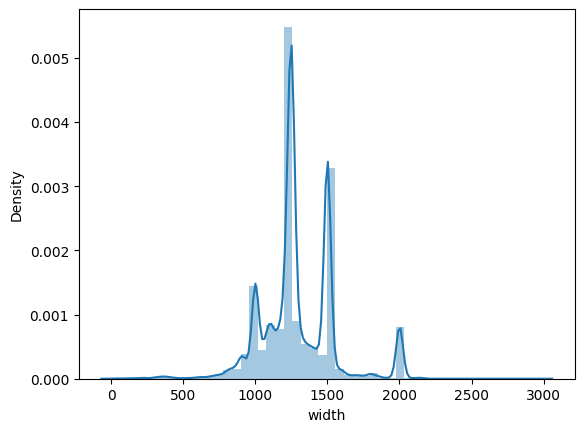

<ipython-input-153-b5a690243661>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["thickness"])


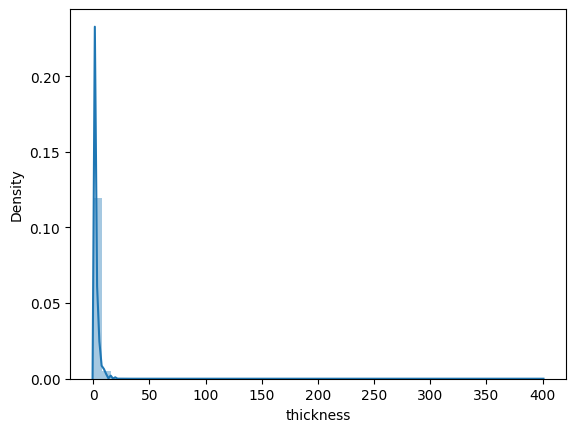

<ipython-input-153-b5a690243661>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["country"])


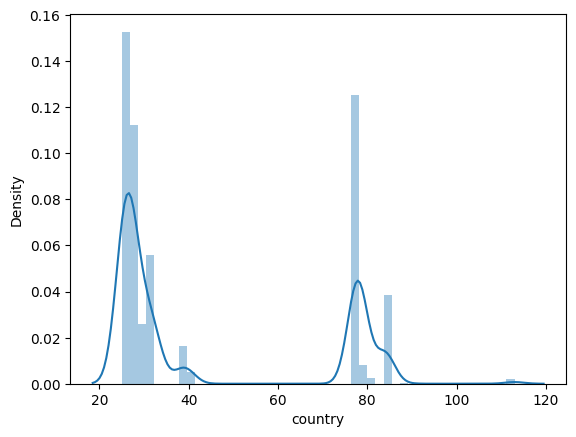

<ipython-input-153-b5a690243661>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["quantity tons"])


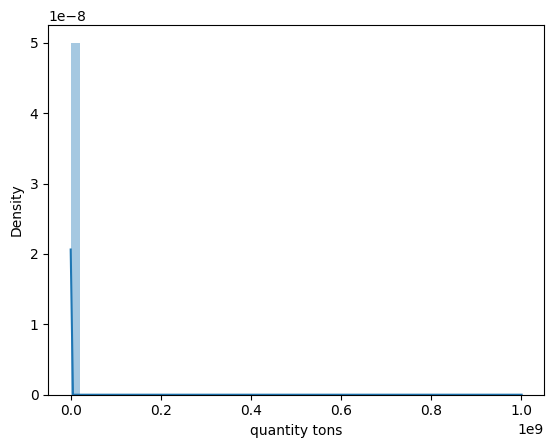

<ipython-input-153-b5a690243661>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["selling_price"])


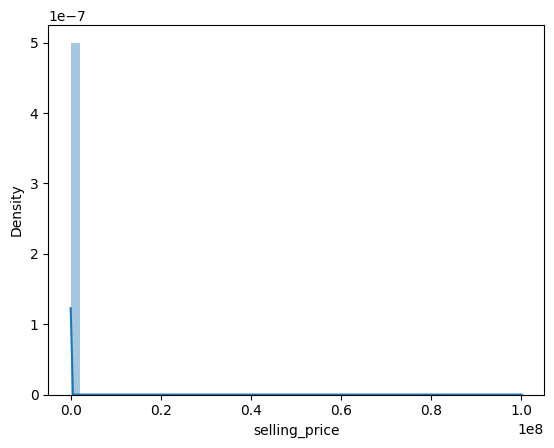

<ipython-input-153-b5a690243661>:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["product_ref"])


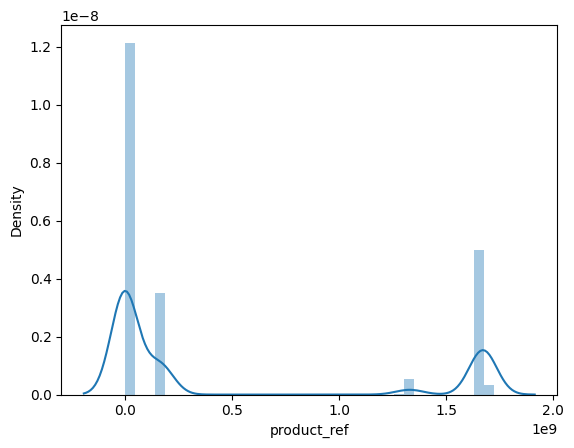

In [153]:
# now we have check the skewness in the data
# to know the skewness we have to plot
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
sns.distplot(data["width"])
plt.show()
sns.distplot(data["thickness"])
plt.show()
sns.distplot(data["country"])
plt.show()
sns.distplot(data["quantity tons"])
plt.show()
sns.distplot(data["selling_price"])
plt.show()
sns.distplot(data["product_ref"])
plt.show()


In [154]:
#  now we have to check the outliers

<Axes: >

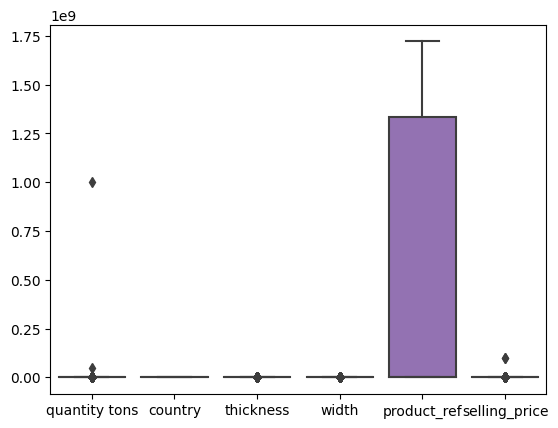

In [155]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(data = data)

In [156]:
# we have to check one by one

<Axes: >

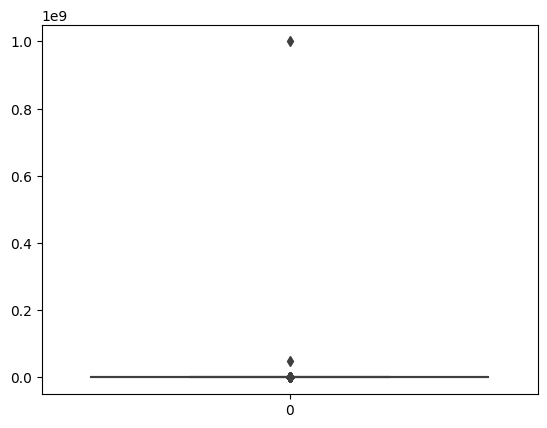

In [157]:
sns.boxplot(data["quantity tons"])

<Axes: >

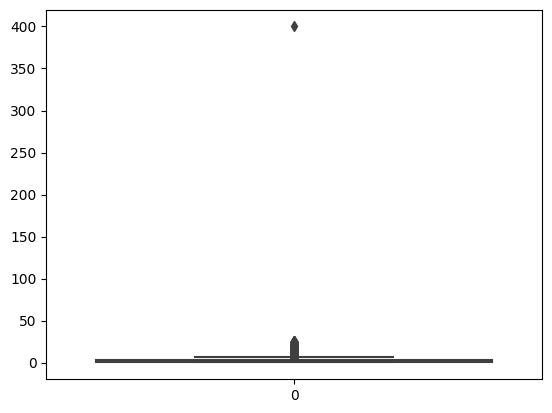

In [158]:
sns.boxplot(data["thickness"])

<Axes: >

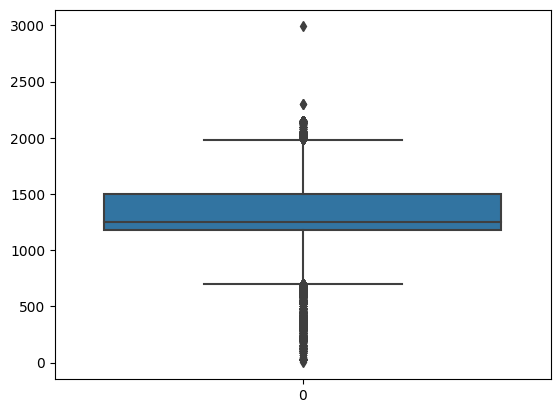

In [159]:
sns.boxplot(data["width"])

<Axes: >

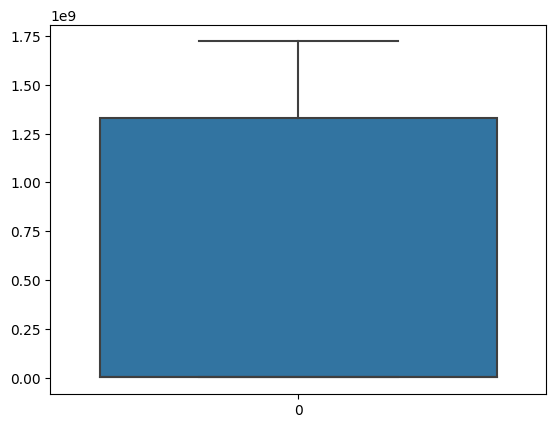

In [160]:
sns.boxplot(data["product_ref"])

In [161]:
# I am training the model without removing or treating the outliers

In [162]:
# Before training the model we have check the data weather train data are in int or not ,if theiris in object means we have to scale it

In [163]:
data.columns

Index(['quantity tons', 'country', 'status', 'item type', 'thickness', 'width',
       'product_ref', 'selling_price'],
      dtype='object')

In [164]:
data["item type"].unique()

array(['W', 'WI', 'S', 'Others', 'PL', 'IPL', 'SLAWR'], dtype=object)

In [165]:
data.head(2)

,quantity tons,country,status,item type,thickness,width,product_ref,selling_price
0,54.151139,28.0,Won,W,2.0,1500.0,1670798778,854.0
1,768.024839,25.0,Won,W,0.8,1210.0,1668701718,1047.0


In [166]:
data

,quantity tons,country,status,item type,thickness,width,product_ref,selling_price
0,54.151139,28.0,Won,W,2.00,1500.0,1670798778,854.00
1,768.024839,25.0,Won,W,0.80,1210.0,1668701718,1047.00
2,386.127949,30.0,Won,WI,0.38,952.0,628377,644.33
3,202.411065,32.0,Won,S,2.30,1317.0,1668701718,768.00
4,785.526262,28.0,Won,W,4.00,2000.0,640665,577.00
...,...,...,...,...,...,...,...,...
181668,102.482422,25.0,Won,W,0.96,1220.0,164141591,591.00
181669,208.086469,25.0,Won,W,0.95,1500.0,164141591,589.00
181670,4.235594,25.0,Won,W,0.71,1250.0,164141591,619.00
181671,-2000.000000,25.0,Won,W,0.85,1250.0,164141591,601.00


In [167]:
data[data['quantity tons'] <= 0]

,quantity tons,country,status,item type,thickness,width,product_ref,selling_price
105730,-4.000000,27.0,Won,S,1.50,1500.0,1332077137,723.0
131473,-1.476794,27.0,Draft,S,0.60,1220.0,611993,22.0
181661,-18.000000,25.0,Won,W,0.84,1220.0,164141591,590.0
181671,-2000.000000,25.0,Won,W,0.85,1250.0,164141591,601.0


In [168]:
data[data['thickness'] <= 0]

,quantity tons,country,status,item type,thickness,width,product_ref,selling_price


In [169]:
data[data['width'] <= 0]

,quantity tons,country,status,item type,thickness,width,product_ref,selling_price


In [170]:
data[data['selling_price'] <= 0]

,quantity tons,country,status,item type,thickness,width,product_ref,selling_price
28,99.059199,30.0,Won,W,0.595,1207.0,611993,-1160.0
44761,101.397995,32.0,Won,W,1.250,1100.0,1721130331,-730.0
44810,12.225889,78.0,Won,W,0.750,1250.0,164141591,-445.0
44865,28.368563,27.0,Not lost for AM,PL,1.500,1270.0,164141591,-25.0
105189,5.280274,25.0,Won,W,6.000,1250.0,1671863738,-336.0


In [171]:
data[data['country'] <= 0]

,quantity tons,country,status,item type,thickness,width,product_ref,selling_price


In [172]:
data[data['product_ref'] <= 0]

,quantity tons,country,status,item type,thickness,width,product_ref,selling_price


In [173]:
skew = data['quantity tons'] <= 0
print(skew)

0         False
1         False
2         False
3         False
4         False
          ...  
181668    False
181669    False
181670    False
181671     True
181672    False
Name: quantity tons, Length: 181638, dtype: bool


In [174]:
skew = data['quantity tons'] <= 0
print(skew.sum())
# data.loc[skew, 'quantity tons'] = np.nan
skew
skew = data['thickness'] <= 0
print(skew.sum())

skew = data['selling_price'] <= 0
print(skew.sum())

4
0
5


In [175]:
data.drop(data[data['quantity tons'] <= 0].index,axis = 0, inplace = True)

In [176]:
data.drop(data[data['selling_price'] <= 0].index,axis = 0, inplace = True)

In [177]:
skew = data['quantity tons'] <= 0
print(skew.sum())
# data.loc[skew, 'quantity tons'] = np.nan
skew
skew = data['thickness'] <= 0
print(skew.sum())

skew = data['selling_price'] <= 0
print(skew.sum())

0
0
0


In [178]:
data

,quantity tons,country,status,item type,thickness,width,product_ref,selling_price
0,54.151139,28.0,Won,W,2.00,1500.0,1670798778,854.00
1,768.024839,25.0,Won,W,0.80,1210.0,1668701718,1047.00
2,386.127949,30.0,Won,WI,0.38,952.0,628377,644.33
3,202.411065,32.0,Won,S,2.30,1317.0,1668701718,768.00
4,785.526262,28.0,Won,W,4.00,2000.0,640665,577.00
...,...,...,...,...,...,...,...,...
181667,106.783299,25.0,Won,W,0.96,1240.0,164141591,602.00
181668,102.482422,25.0,Won,W,0.96,1220.0,164141591,591.00
181669,208.086469,25.0,Won,W,0.95,1500.0,164141591,589.00
181670,4.235594,25.0,Won,W,0.71,1250.0,164141591,619.00


In [179]:
data.dropna(inplace = True)

In [180]:
# taking log to distribute
import numpy as np
data["quantity tons"] = np.log(data["quantity tons"])
data["thickness"] = np.log(data["thickness"])
# data["width"] = np.log(data["width"])
# data["item type"] = np.log(data["item type"])
# data["product_ref"] = np.log(data["product_ref"])
data["selling_price"] = np.log(data["selling_price"])

In [181]:
data

,quantity tons,country,status,item type,thickness,width,product_ref,selling_price
0,3.991779,28.0,Won,W,0.693147,1500.0,1670798778,6.749931
1,6.643822,25.0,Won,W,-0.223144,1210.0,1668701718,6.953684
2,5.956169,30.0,Won,WI,-0.967584,952.0,628377,6.468211
3,5.310301,32.0,Won,S,0.832909,1317.0,1668701718,6.643790
4,6.666354,28.0,Won,W,1.386294,2000.0,640665,6.357842
...,...,...,...,...,...,...,...,...
181667,4.670802,25.0,Won,W,-0.040822,1240.0,164141591,6.400257
181668,4.629691,25.0,Won,W,-0.040822,1220.0,164141591,6.381816
181669,5.337954,25.0,Won,W,-0.051293,1500.0,164141591,6.378426
181670,1.443523,25.0,Won,W,-0.342490,1250.0,164141591,6.428105


<ipython-input-182-3e55a6b2206a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["quantity tons"])


<Axes: xlabel='quantity tons', ylabel='Density'>

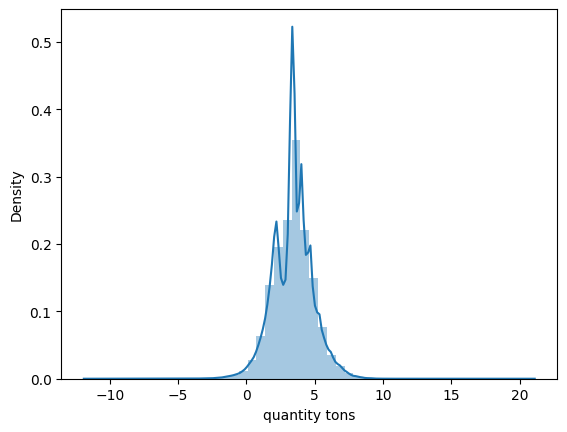

In [182]:
sns.distplot(data["quantity tons"])

<ipython-input-183-f3c56218fbba>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["selling_price"])


<Axes: xlabel='selling_price', ylabel='Density'>

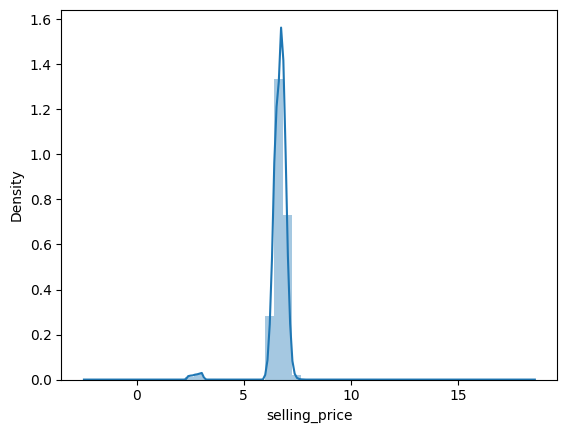

In [183]:
sns.distplot(data["selling_price"])

In [184]:
columns = ["quantity tons","country", "thickness", "width", "product_ref"]

<Axes: >

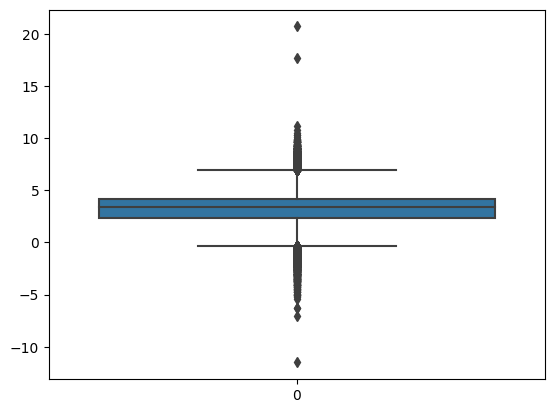

In [185]:
sns.boxplot(data["quantity tons"])

In [186]:
def remove_outliers(data, columns):
    for column in columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

    return data

In [187]:
# data = remove_outliers(data, columns)

In [188]:
data

,quantity tons,country,status,item type,thickness,width,product_ref,selling_price
0,3.991779,28.0,Won,W,0.693147,1500.0,1670798778,6.749931
1,6.643822,25.0,Won,W,-0.223144,1210.0,1668701718,6.953684
2,5.956169,30.0,Won,WI,-0.967584,952.0,628377,6.468211
3,5.310301,32.0,Won,S,0.832909,1317.0,1668701718,6.643790
4,6.666354,28.0,Won,W,1.386294,2000.0,640665,6.357842
...,...,...,...,...,...,...,...,...
181667,4.670802,25.0,Won,W,-0.040822,1240.0,164141591,6.400257
181668,4.629691,25.0,Won,W,-0.040822,1220.0,164141591,6.381816
181669,5.337954,25.0,Won,W,-0.051293,1500.0,164141591,6.378426
181670,1.443523,25.0,Won,W,-0.342490,1250.0,164141591,6.428105


In [189]:
data.drop_duplicates()

,quantity tons,country,status,item type,thickness,width,product_ref,selling_price
0,3.991779,28.0,Won,W,0.693147,1500.0,1670798778,6.749931
1,6.643822,25.0,Won,W,-0.223144,1210.0,1668701718,6.953684
2,5.956169,30.0,Won,WI,-0.967584,952.0,628377,6.468211
3,5.310301,32.0,Won,S,0.832909,1317.0,1668701718,6.643790
4,6.666354,28.0,Won,W,1.386294,2000.0,640665,6.357842
...,...,...,...,...,...,...,...,...
181667,4.670802,25.0,Won,W,-0.040822,1240.0,164141591,6.400257
181668,4.629691,25.0,Won,W,-0.040822,1220.0,164141591,6.381816
181669,5.337954,25.0,Won,W,-0.051293,1500.0,164141591,6.378426
181670,1.443523,25.0,Won,W,-0.342490,1250.0,164141591,6.428105


<Axes: >

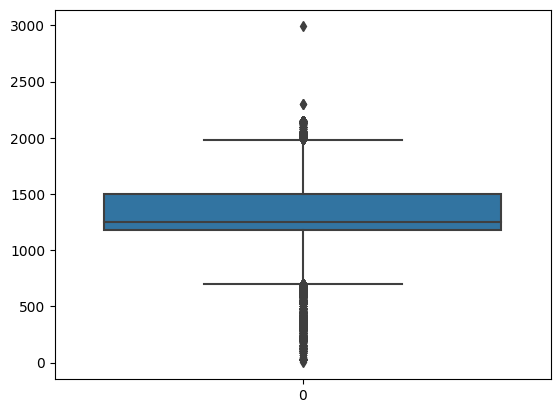

In [190]:
import seaborn as sns
sns.boxplot(data["width"])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb3605c3ca0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb360620220>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb3605c3a00>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb360620760>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb360620a00>],
 'means': []}

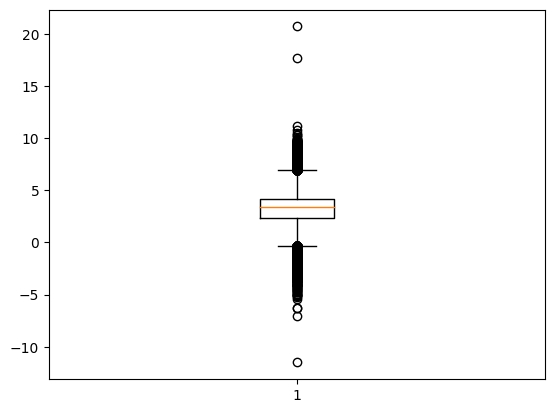

In [191]:
import matplotlib.pyplot as plt
plt.boxplot(data["quantity tons"])

In [192]:
# data.to_csv("F_Copper.csv",index = False )

In [193]:
data.isna().sum()

quantity tons    0
country          0
status           0
item type        0
thickness        0
width            0
product_ref      0
selling_price    0
dtype: int64

In [194]:
data.dropna(subset = ["selling_price"],inplace = True)

In [195]:
data.isna().sum()

quantity tons    0
country          0
status           0
item type        0
thickness        0
width            0
product_ref      0
selling_price    0
dtype: int64

In [196]:
data = data[data['status'].isin(['Won', 'Lost'])]

In [197]:
data

,quantity tons,country,status,item type,thickness,width,product_ref,selling_price
0,3.991779,28.0,Won,W,0.693147,1500.0,1670798778,6.749931
1,6.643822,25.0,Won,W,-0.223144,1210.0,1668701718,6.953684
2,5.956169,30.0,Won,WI,-0.967584,952.0,628377,6.468211
3,5.310301,32.0,Won,S,0.832909,1317.0,1668701718,6.643790
4,6.666354,28.0,Won,W,1.386294,2000.0,640665,6.357842
...,...,...,...,...,...,...,...,...
181667,4.670802,25.0,Won,W,-0.040822,1240.0,164141591,6.400257
181668,4.629691,25.0,Won,W,-0.040822,1220.0,164141591,6.381816
181669,5.337954,25.0,Won,W,-0.051293,1500.0,164141591,6.378426
181670,1.443523,25.0,Won,W,-0.342490,1250.0,164141591,6.428105


In [198]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

In [199]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['item type'] = label_encoder.fit_transform(data['item type'])

<ipython-input-199-870a4f61b30b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['item type'] = label_encoder.fit_transform(data['item type'])


In [200]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['product_ref'] = label_encoder.fit_transform(data['product_ref'])

<ipython-input-200-89b539a2fbf1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['product_ref'] = label_encoder.fit_transform(data['product_ref'])


In [201]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['status'] = label_encoder.fit_transform(data['status'])

<ipython-input-201-027a705949c6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['status'] = label_encoder.fit_transform(data['status'])


In [202]:
data

,quantity tons,country,status,item type,thickness,width,product_ref,selling_price
0,3.991779,28.0,1,5,0.693147,1500.0,23,6.749931
1,6.643822,25.0,1,5,-0.223144,1210.0,21,6.953684
2,5.956169,30.0,1,6,-0.967584,952.0,5,6.468211
3,5.310301,32.0,1,3,0.832909,1317.0,21,6.643790
4,6.666354,28.0,1,5,1.386294,2000.0,8,6.357842
...,...,...,...,...,...,...,...,...
181667,4.670802,25.0,1,5,-0.040822,1240.0,9,6.400257
181668,4.629691,25.0,1,5,-0.040822,1220.0,9,6.381816
181669,5.337954,25.0,1,5,-0.051293,1500.0,9,6.378426
181670,1.443523,25.0,1,5,-0.342490,1250.0,9,6.428105


In [203]:
data["item type"].unique()

array([5, 6, 3, 1, 2, 0, 4])

In [204]:
data["product_ref"].unique()

array([23, 21,  5,  8,  2, 19,  9, 24, 14,  7, 28, 16, 13, 20,  4, 26,  3,
        6, 25, 10, 15, 11,  0, 30, 29,  1, 27, 31, 12, 22, 17, 18])

In [205]:
data["status"].unique()

array([1, 0])

In [206]:
# X = data[['quantity tons','thickness', 'width','country','product_ref']]
# scaler = StandardScaler()
# P = scaler.fit_transform(X)

In [207]:
data

,quantity tons,country,status,item type,thickness,width,product_ref,selling_price
0,3.991779,28.0,1,5,0.693147,1500.0,23,6.749931
1,6.643822,25.0,1,5,-0.223144,1210.0,21,6.953684
2,5.956169,30.0,1,6,-0.967584,952.0,5,6.468211
3,5.310301,32.0,1,3,0.832909,1317.0,21,6.643790
4,6.666354,28.0,1,5,1.386294,2000.0,8,6.357842
...,...,...,...,...,...,...,...,...
181667,4.670802,25.0,1,5,-0.040822,1240.0,9,6.400257
181668,4.629691,25.0,1,5,-0.040822,1220.0,9,6.381816
181669,5.337954,25.0,1,5,-0.051293,1500.0,9,6.378426
181670,1.443523,25.0,1,5,-0.342490,1250.0,9,6.428105


In [208]:
X = (data[['quantity tons', 'thickness', 'width','country',"selling_price"]])
scaler = StandardScaler()
scaled = scaler.fit_transform(X)

In [209]:
import numpy as np
K  =  np.concatenate([scaled, data[["item type","product_ref","status"]].values], axis=1)


In [210]:
K

array([[ 0.42909513,  0.20223299,  0.7595267 , ...,  5.        ,
        23.        ,  1.        ],
       [ 2.26866547, -0.78158235, -0.33002728, ...,  5.        ,
        21.        ,  1.        ],
       [ 1.79167978, -1.58088319, -1.29935462, ...,  6.        ,
         5.        ,  1.        ],
       ...,
       [ 1.3628594 , -0.59706785,  0.7595267 , ...,  5.        ,
         9.        ,  1.        ],
       [-1.33848373, -0.90972417, -0.17974398, ...,  5.        ,
         9.        ,  1.        ],
       [ 1.82766175, -0.90972417, -0.2173148 , ...,  5.        ,
         9.        ,  1.        ]])

In [211]:
data = pd.DataFrame(K,columns = ['quantity tons', 'thickness', 'width','country',"selling_price","item type","product_ref","status"])

In [212]:
data

,quantity tons,thickness,width,country,selling_price,item type,product_ref,status
0,0.429095,0.202233,0.759527,-0.710192,0.261202,5.0,23.0,1.0
1,2.268665,-0.781582,-0.330027,-0.832700,1.106338,5.0,21.0,1.0
2,1.791680,-1.580883,-1.299355,-0.628520,-0.907329,6.0,5.0,1.0
3,1.343678,0.352294,0.071981,-0.546847,-0.179056,3.0,21.0,1.0
4,2.284294,0.946461,2.638068,-0.710192,-1.365122,5.0,8.0,1.0
...,...,...,...,...,...,...,...,...
150429,0.900094,-0.585825,-0.217315,-0.832700,-1.189190,5.0,9.0,1.0
150430,0.871578,-0.585825,-0.292456,-0.832700,-1.265682,5.0,9.0,1.0
150431,1.362859,-0.597068,0.759527,-0.832700,-1.279743,5.0,9.0,1.0
150432,-1.338484,-0.909724,-0.179744,-0.832700,-1.073682,5.0,9.0,1.0


In [213]:
data.isna().sum()

quantity tons    0
thickness        0
width            0
country          0
selling_price    0
item type        0
product_ref      0
status           0
dtype: int64

In [214]:
X = data[["quantity tons","thickness","width","country","selling_price","item type","product_ref"]]
Y = data[["status"]]

In [274]:
#Splitting Data into Train and Test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [216]:
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)

In [217]:
X_train.shape

(105303, 7)

In [218]:
# d_t_r = DecisionTreeRegressor()
# parameter_grid_value = {
#     'max_depth': [2, 5, 10, 20, None],
#     'min_samples_split': [2, 5, 10, 15],
#     'min_samples_leaf': [1, 2, 4, 8],
#     'max_features': ['auto', 'sqrt', 'log2', None],
#     'criterion': ['mse', 'friedman_mse', 'mae']
# }


# grid_search_cv = GridSearchCV(estimator=d_t_r, param_grid=parameter_grid_value, cv=5)
# grid_search_cv.fit(X_train, y_train)

# best_parameters = grid_search_cv.best_params_
# print("Best HyperParameters:", best_parameters)
# crt_model = grid_search_cv.best_estimator_

In [219]:
from sklearn.tree import DecisionTreeClassifier

In [293]:
Model_C = DecisionTreeClassifier(criterion='gini',max_depth =40, min_samples_leaf=10,min_samples_split=5)
Model_C.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=40, min_samples_leaf=10, min_samples_split=5)

In [294]:
from sklearn.metrics import accuracy_score,f1_score
y_predicted_values = Model_C.predict(X_test)
print(Model_C)
#Evaluating
Accuracy = accuracy_score(y_test, y_predicted_values)
f1 = f1_score(y_test, y_predicted_values)
print('Mean Square Error is : ', Accuracy)
print('R-square value is : ', f1)

DecisionTreeClassifier(max_depth=40, min_samples_leaf=10, min_samples_split=5)
Mean Square Error is :  0.8514768119474418
R-square value is :  0.904022107991237


In [295]:
from sklearn.metrics import confusion_matrix
Q = confusion_matrix(y_test, y_predicted_values)
pd.DataFrame(Q)

,0,1
0,6860,3520
1,3183,31568


In [260]:
X_test.values[1]

array([ 0.90317053, -1.58088319, -1.13404298,  1.57662884,  0.56997809,
        3.        ,  9.        ])

In [262]:
A = Model_C.predict([X_test.values[1]])
print(A)


[1.]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [263]:
X.dtypes

quantity tons    float64
thickness        float64
width            float64
country          float64
selling_price    float64
item type        float64
product_ref      float64
dtype: object

In [226]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150434 entries, 0 to 150433
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   quantity tons  150434 non-null  float64
 1   thickness      150434 non-null  float64
 2   width          150434 non-null  float64
 3   country        150434 non-null  float64
 4   selling_price  150434 non-null  float64
 5   item type      150434 non-null  float64
 6   product_ref    150434 non-null  float64
 7   status         150434 non-null  float64
dtypes: float64(8)
memory usage: 9.2 MB


In [264]:
data

,quantity tons,thickness,width,country,selling_price,item type,product_ref,status
0,0.429095,0.202233,0.759527,-0.710192,0.261202,5.0,23.0,1.0
1,2.268665,-0.781582,-0.330027,-0.832700,1.106338,5.0,21.0,1.0
2,1.791680,-1.580883,-1.299355,-0.628520,-0.907329,6.0,5.0,1.0
3,1.343678,0.352294,0.071981,-0.546847,-0.179056,3.0,21.0,1.0
4,2.284294,0.946461,2.638068,-0.710192,-1.365122,5.0,8.0,1.0
...,...,...,...,...,...,...,...,...
150429,0.900094,-0.585825,-0.217315,-0.832700,-1.189190,5.0,9.0,1.0
150430,0.871578,-0.585825,-0.292456,-0.832700,-1.265682,5.0,9.0,1.0
150431,1.362859,-0.597068,0.759527,-0.832700,-1.279743,5.0,9.0,1.0
150432,-1.338484,-0.909724,-0.179744,-0.832700,-1.073682,5.0,9.0,1.0


In [266]:
X_train

,quantity tons,thickness,width,country,selling_price,item type,product_ref
56793,-0.856147,-1.364141,-0.029461,-0.628520,1.433659,5.0,2.0
13904,-0.923076,1.690688,2.600497,-0.628520,-0.338714,2.0,8.0
146220,-1.349824,-0.106649,0.026896,-0.628520,-1.408479,5.0,21.0
30929,-0.104476,1.186048,2.600497,1.290776,0.304686,5.0,7.0
11546,-0.986355,-0.850877,-0.179744,1.576629,1.066531,5.0,4.0
...,...,...,...,...,...,...,...
119879,-0.394776,-0.302407,-0.179744,-0.628520,-0.915900,3.0,9.0
103694,0.442227,-1.448160,-0.187258,-0.710192,0.005793,5.0,2.0
131932,0.600482,1.690688,0.759527,-0.791864,-1.161721,3.0,23.0
146867,1.219722,-0.106649,-1.119015,1.331612,-1.788584,5.0,5.0


In [267]:
X.columns

Index(['quantity tons', 'thickness', 'width', 'country', 'selling_price',
       'item type', 'product_ref'],
      dtype='object')

In [269]:
feature_importances = pd.Series(Model_C.feature_importances_)
print(feature_importances)

0    0.160824
1    0.095677
2    0.092356
3    0.204863
4    0.178993
5    0.170831
6    0.096456
dtype: float64


In [270]:
data

,quantity tons,thickness,width,country,selling_price,item type,product_ref,status
0,0.429095,0.202233,0.759527,-0.710192,0.261202,5.0,23.0,1.0
1,2.268665,-0.781582,-0.330027,-0.832700,1.106338,5.0,21.0,1.0
2,1.791680,-1.580883,-1.299355,-0.628520,-0.907329,6.0,5.0,1.0
3,1.343678,0.352294,0.071981,-0.546847,-0.179056,3.0,21.0,1.0
4,2.284294,0.946461,2.638068,-0.710192,-1.365122,5.0,8.0,1.0
...,...,...,...,...,...,...,...,...
150429,0.900094,-0.585825,-0.217315,-0.832700,-1.189190,5.0,9.0,1.0
150430,0.871578,-0.585825,-0.292456,-0.832700,-1.265682,5.0,9.0,1.0
150431,1.362859,-0.597068,0.759527,-0.832700,-1.279743,5.0,9.0,1.0
150432,-1.338484,-0.909724,-0.179744,-0.832700,-1.073682,5.0,9.0,1.0


In [296]:
data.to_csv("F_C_Copper.csv",index = False)

In [297]:
import pickle

with open("Model_R.pkl", "wb") as file:
    pickle.dump(Model_C, file)


In [273]:
data

,quantity tons,thickness,width,country,selling_price,item type,product_ref,status
0,0.429095,0.202233,0.759527,-0.710192,0.261202,5.0,23.0,1.0
1,2.268665,-0.781582,-0.330027,-0.832700,1.106338,5.0,21.0,1.0
2,1.791680,-1.580883,-1.299355,-0.628520,-0.907329,6.0,5.0,1.0
3,1.343678,0.352294,0.071981,-0.546847,-0.179056,3.0,21.0,1.0
4,2.284294,0.946461,2.638068,-0.710192,-1.365122,5.0,8.0,1.0
...,...,...,...,...,...,...,...,...
150429,0.900094,-0.585825,-0.217315,-0.832700,-1.189190,5.0,9.0,1.0
150430,0.871578,-0.585825,-0.292456,-0.832700,-1.265682,5.0,9.0,1.0
150431,1.362859,-0.597068,0.759527,-0.832700,-1.279743,5.0,9.0,1.0
150432,-1.338484,-0.909724,-0.179744,-0.832700,-1.073682,5.0,9.0,1.0
